# 2018-04-24 - Génerer des sets de MotionClouds statiques
On va génerer des ensembles de 500 MotionClouds statiques pour différentes valeurs de B$\theta$ et $\theta$, dans le but de faire apprendre à un réseau convolutionné la détection de l'orientation $\theta$. Plus B$\theta$ est grand, moins la détection de l'orientation devrait être facile :

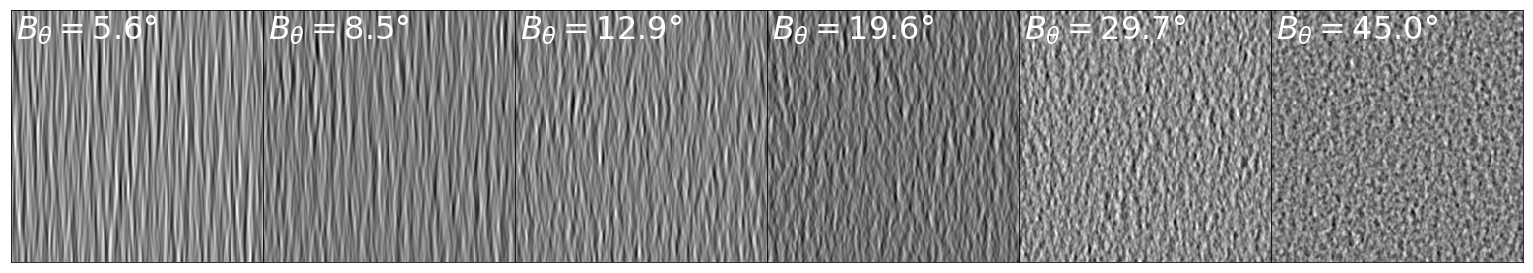

In [2]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)


N_theta = 6
bw_values = np.pi*np.logspace(-5, -2, N_theta, base=2)
fig_width = 21


fig, axs = plt.subplots(1, N_theta, figsize=(fig_width, fig_width/N_theta))
for i_ax, B_theta in enumerate(bw_values):
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=np.pi/2, B_theta=B_theta)
    im = mc.random_cloud(mc_i)
                
    axs[i_ax].imshow(im[:, :, 0], cmap=plt.gray())
    axs[i_ax].text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='white', fontsize=32)
    axs[i_ax].set_xticks([])
    axs[i_ax].set_yticks([])
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)

On commence par génerer un ensemble de 500 clouds pour B$\theta$ appartenant à [1°:15°] pour $\theta$ = 0, $\theta$ = $\pi$/4, $\theta$ = $\pi$/2, $\theta$ = 3$\pi$/4.
Pour chaque $\theta$, on va créer un folder spécifique ou seront sauvegardés les 500 clouds.
![Err : Impossible d'afficher le cercle trigonométrique](http://etc.usf.edu/clipart/43200/43215/unit-circle7_43215_sm.gif)
On crée aussi un folder de 25 clouds qui serviront à tester le réseau.

In [2]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio

downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

N_theta = 500
N_theta_test = 25

bw_values = np.pi*np.logspace(-7,-3.5, N_theta, base=2)
bw_test_values = np.pi*np.logspace(-7,-3.5, N_theta_test, base=2)
fig_width = 21
print('Btheta list : \n'+str( bw_values*180/np.pi))

theta_list = [0,np.pi/2, np.pi/4, 3*np.pi/4] #liste des angles theta

for t in theta_list :
    if not os.path.exists('./clouds_easy/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_easy/%s' % t)
    
    for i_ax, B_theta in enumerate(bw_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_easy/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()       

for t in theta_list :
    if not os.path.exists('./clouds_easy/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_easy/%s' % t)
    if not os.path.exists('./clouds_easy_test/%s' % t):
        os.makedirs('./clouds_easy_test/%s' % t)

    for i_ax, B_theta in enumerate(bw_test_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_easy_test/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()

Pour des valeurs de B$\theta$ entre 15° et 30° (un peu plus dur) :

In [3]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio

downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

N_theta = 500
N_theta_test = 25

bw_values = np.pi*np.logspace(-3.5, -2.5, N_theta, base=2)
bw_test_values = np.pi*np.logspace(-3.5,-2.5, N_theta_test, base=2)

fig_width = 21
print('Btheta list : \n'+str( bw_values*180/np.pi))

theta_list = [0,np.pi/2, np.pi/4, 3*np.pi/4] #liste des angles theta
for t in theta_list :
    if not os.path.exists('./clouds_medium/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_medium/%s' % t)

    for i_ax, B_theta in enumerate(bw_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_medium/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()
        
for t in theta_list :
    if not os.path.exists('./clouds_medium_test/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_medium_test/%s' % t)

    for i_ax, B_theta in enumerate(bw__test_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_medium_test/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()

Btheta list : 
[15.90990258 15.93201794 15.95416405 15.97634094 15.99854865 16.02078724
 16.04305674 16.06535719 16.08768864 16.11005114 16.13244472 16.15486942
 16.1773253  16.19981239 16.22233074 16.2448804  16.26746139 16.29007378
 16.31271759 16.33539289 16.3580997  16.38083807 16.40360806 16.42640969
 16.44924302 16.47210809 16.49500494 16.51793362 16.54089417 16.56388664
 16.58691106 16.60996749 16.63305598 16.65617655 16.67932926 16.70251416
 16.72573129 16.74898068 16.7722624  16.79557647 16.81892296 16.8423019
 16.86571333 16.88915731 16.91263387 16.93614307 16.95968495 16.98325955
 17.00686692 17.03050711 17.05418016 17.07788611 17.10162502 17.12539692
 17.14920187 17.17303991 17.19691108 17.22081543 17.24475302 17.26872387
 17.29272805 17.3167656  17.34083655 17.36494097 17.38907889 17.41325037
 17.43745544 17.46169416 17.48596658 17.51027273 17.53461267 17.55898644
 17.5833941  17.60783568 17.63231123 17.65682081 17.68136446 17.70594222
 17.73055415 17.75520029 17.77988068 

NameError: name 'bw__test_values' is not defined

Et enfin pour des valeurs de B$\theta$ entre 30° et 45° (difficile) :

In [ ]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio

downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

N_theta = 500
N_theta_test = 25

bw_values = np.pi*np.logspace(-2.5,-2, N_theta, base=2)
bw_test_values = np.pi*np.logspace(-2.5,-2, N_theta, base=2)

fig_width = 21
print('Btheta list : \n'+str( bw_values*180/np.pi))

theta_list = [0,np.pi/2, np.pi/4, 3*np.pi/4] #liste des angles theta

for t in theta_list :
    if not os.path.exists('./clouds_hard/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_hard/%s' % t)

    for i_ax, B_theta in enumerate(bw_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_hard/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()
        
for t in theta_list :
    if not os.path.exists('./clouds_hard_test/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_hard_test/%s' % t)

    for i_ax, B_theta in enumerate(bw_test_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_hard_test/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()

Btheta list : 
[31.81980515 31.84191284 31.86403588 31.8861743  31.90832809 31.93049728
 31.95268187 31.97488188 31.99709731 32.01932817 32.04157448 32.06383624
 32.08611348 32.10840619 32.13071438 32.15303808 32.17537729 32.19773202
 32.22010228 32.24248808 32.26488943 32.28730635 32.30973885 32.33218693
 32.3546506  32.37712989 32.39962479 32.42213532 32.44466149 32.46720331
 32.48976079 32.51233394 32.53492278 32.55752732 32.58014755 32.60278351
 32.62543519 32.6481026  32.67078577 32.6934847  32.7161994  32.73892988
 32.76167615 32.78443822 32.80721611 32.83000983 32.85281938 32.87564478
 32.89848604 32.92134317 32.94421617 32.96710507 32.99000988 33.01293059
 33.03586724 33.05881981 33.08178834 33.10477282 33.12777327 33.1507897
 33.17382212 33.19687055 33.21993499 33.24301545 33.26611195 33.2892245
 33.3123531  33.33549777 33.35865853 33.38183537 33.40502832 33.42823738
 33.45146257 33.47470389 33.49796137 33.521235   33.5445248  33.56783078
 33.59115295 33.61449133 33.63784592 3